In [1]:
#KMeans: En yakın komşu ile kümeleme

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [43]:
df=pd.read_excel("Worldmilitarypower.xlsx")

In [44]:
df.head()

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987
2,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,...,Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691
3,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734
4,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369


In [45]:
df.columns=df.loc[0]
df.drop([0], axis=0, inplace=True)

In [46]:
#tekrar eden ülke sütunlarını silmek için 
df = df.loc[:,~df.apply(lambda x: x.duplicated(),axis=1).all()].copy()

In [47]:
df

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,260,0,25,30,0,187,0,0,...,5500,0,"1,43,25,743","3,49,40,837","6,52,230",Afghanistan,0,1200,Afghanistan,5987
2,Albania,2.3137,19,0,0,0,0,19,0,0,...,42500,"16,83,00,000","15,19,438","30,57,220",28748,Albania,362,41,Albania,691
3,Algeria,0.4659,551,103,22,59,87,257,45,880,...,"3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",Algeria,998,0,Algeria,6734
4,Angola,0.8379,295,72,18,30,47,126,15,379,...,82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",Angola,1600,1300,Angola,5369
5,Argentina,0.6521,227,24,7,9,64,100,0,370,...,"6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",Argentina,4989,11000,Argentina,11968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Venezuela,0.6449,260,38,0,52,82,86,10,390,...,"5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",Venezuela,2800,7100,Venezuela,5267
135,Vietnam,0.3559,293,77,0,38,36,138,25,2615,...,"5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",Vietnam,3444,17702,Vietnam,4616
136,Yemen,1.2412,169,77,0,8,21,61,14,620,...,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",Yemen,1906,0,Yemen,1601
137,Zambia,1.6464,108,18,0,11,52,27,0,75,...,21000,0,"61,66,905","1,64,45,079","7,52,618",NaN,NaN,2250,Zambia,6043


In [48]:
df.isnull().sum()

0
Military Strength                           0
Military Strength Power Index               0
Aircraft Strength value                     0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Tank Strength value                         0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength value     0
Towed Artillery Strength value              0
Rocket Projector Strength value             0
Navy Fleet Strengths                       14
Navy Fleet Strengths value                 14
Aircraft Carrier Fleet Strength            23
Aircraft Carrier Fleet Strength value      23
Submarine Fleet Strength value             23
Destroyer Fleet Strength value             23
Frigate Fleet Strength value               23
defense spending budget value   

In [49]:
df.drop(["Navy Fleet Strengths","Navy Fleet Strengths value","Aircraft Carrier Fleet Strength",
         "Aircraft Carrier Fleet Strength value","Submarine Fleet Strength value",
         "Destroyer Fleet Strength value","Frigate Fleet Strength value",
        "Total Coastline Coverage","Total Coastline Coverage value","Total Border Coverage","Total Border Coverage value"],axis=1,inplace=True)

In [50]:
df.isnull().sum()

0
Military Strength                          0
Military Strength Power Index              0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
defense spending budget value              0
External Debt value                        0
Airport Totals value                       0
Oil Production value                       0
Oil Consumption value                      0
Proven Oil Reserves value                  0
Available Manpower value                   0
Total Population value                     0
Total Sq

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Military Strength                        138 non-null    object
 1   Military Strength Power Index            138 non-null    object
 2   Aircraft Strength value                  138 non-null    object
 3   Fighter/Interceptor Strength value       138 non-null    object
 4   Attack Aircraft Strength value           138 non-null    object
 5   Transport Aircraft Fleet Strength value  138 non-null    object
 6   Trainer Aircraft Fleet value             138 non-null    object
 7   Helicopter Fleet Strength value          138 non-null    object
 8   Attack Helicopter Fleet Strength value   138 non-null    object
 9   Tank Strength value                      138 non-null    object
 10  AFV/APC Strength value                   138 non-null    objec

In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [53]:
x=df[["Aircraft Strength value","Attack Aircraft Strength value","defense spending budget value",
      "Available Manpower value","Total Population value"]]

In [54]:
x.head()

,Aircraft Strength value,Attack Aircraft Strength value,defense spending budget value,Available Manpower value,Total Population value
1,260,25,"12,00,00,00,000","1,43,25,743","3,49,40,837"
2,19,0,"25,00,00,000","15,19,438","30,57,220"
3,551,22,"13,00,00,00,000","2,07,41,263","4,16,57,488"
4,295,18,"7,00,00,00,000","62,44,205","3,03,55,880"
5,227,7,"4,20,00,00,000","2,01,79,430","4,46,94,198"


In [55]:
#sütun isimlerini bitişik yazmak için
df.columns=(df.columns).str.replace(' ','')

In [56]:
int_features=['defensespendingbudgetvalue','AvailableManpowervalue','TotalPopulationvalue']
float_features=['MilitaryStrengthPowerIndex','Fighter/InterceptorStrengthvalue','TransportAircraftFleetStrengthvalue',
                'TrainerAircraftFleetvalue','HelicopterFleetStrengthvalue',
                'AttackHelicopterFleetStrengthvalue','TankStrengthvalue','AFV/APCStrengthvalue',
       'Self-PropelledArtilleryStrengthvalue','TowedArtilleryStrengthvalue','RocketProjectorStrengthvalue','AirportTotalsvalue']

#object olarak kayıtlı float veri tipindeki verileri floata çevirme
for i in range(0,len(float_features)):
    df[float_features[i]]=(df[float_features[i]]).astype(float)

In [57]:
df

,MilitaryStrength,MilitaryStrengthPowerIndex,AircraftStrengthvalue,Fighter/InterceptorStrengthvalue,AttackAircraftStrengthvalue,TransportAircraftFleetStrengthvalue,TrainerAircraftFleetvalue,HelicopterFleetStrengthvalue,AttackHelicopterFleetStrengthvalue,TankStrengthvalue,...,defensespendingbudgetvalue,ExternalDebtvalue,AirportTotalsvalue,OilProductionvalue,OilConsumptionvalue,ProvenOilReservesvalue,AvailableManpowervalue,TotalPopulationvalue,TotalSquareLandAreavalue,TotalWaterwayCoveragevalue
1,Afghanistan,1.3444,260,0.0,25,30.0,0.0,187.0,0.0,0.0,...,"12,00,00,00,000","2,84,00,00,000",43.0,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",1200
2,Albania,2.3137,19,0.0,0,0.0,0.0,19.0,0.0,0.0,...,"25,00,00,000","9,50,50,00,000",4.0,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,41
3,Algeria,0.4659,551,103.0,22,59.0,87.0,257.0,45.0,880.0,...,"13,00,00,00,000","6,26,00,00,000",157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",0
4,Angola,0.8379,295,72.0,18,30.0,47.0,126.0,15.0,379.0,...,"7,00,00,00,000","42,08,00,00,000",176.0,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1300
5,Argentina,0.6521,227,24.0,7,9.0,64.0,100.0,0.0,370.0,...,"4,20,00,00,000","2,14,90,00,00,000",1138.0,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",11000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Venezuela,0.6449,260,38.0,0,52.0,82.0,86.0,10.0,390.0,...,"74,50,00,000","1,00,30,00,00,000",444.0,"20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",7100
135,Vietnam,0.3559,293,77.0,0,38.0,36.0,138.0,25.0,2615.0,...,"5,50,00,00,000","96,58,00,00,000",45.0,"2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",17702
136,Yemen,1.2412,169,77.0,0,8.0,21.0,61.0,14.0,620.0,...,"1,40,00,00,000","7,06,80,00,000",57.0,12260,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",0
137,Zambia,1.6464,108,18.0,0,11.0,52.0,27.0,0.0,75.0,...,"4,00,00,000","11,66,00,00,000",88.0,0,21000,0,"61,66,905","1,64,45,079","7,52,618",2250


In [58]:
#virgülle yanlış ayrılmış olduğu varsayımında virgülleri çıkarıp int değere dönüştürüldü.
for i in range(0,len(int_features)):
    df[int_features[i]]=((df[int_features[i]]).str.replace('[^\w\s]','')).astype('str').astype('int64')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   MilitaryStrength                      138 non-null    object 
 1   MilitaryStrengthPowerIndex            138 non-null    float64
 2   AircraftStrengthvalue                 138 non-null    object 
 3   Fighter/InterceptorStrengthvalue      138 non-null    float64
 4   AttackAircraftStrengthvalue           138 non-null    object 
 5   TransportAircraftFleetStrengthvalue   138 non-null    float64
 6   TrainerAircraftFleetvalue             138 non-null    float64
 7   HelicopterFleetStrengthvalue          138 non-null    float64
 8   AttackHelicopterFleetStrengthvalue    138 non-null    float64
 9   TankStrengthvalue                     138 non-null    float64
 10  AFV/APCStrengthvalue                  138 non-null    float64
 11  Self-PropelledArtil

In [60]:
features=[]
features.extend(float_features)
features.extend(int_features)

In [61]:
df

,MilitaryStrength,MilitaryStrengthPowerIndex,AircraftStrengthvalue,Fighter/InterceptorStrengthvalue,AttackAircraftStrengthvalue,TransportAircraftFleetStrengthvalue,TrainerAircraftFleetvalue,HelicopterFleetStrengthvalue,AttackHelicopterFleetStrengthvalue,TankStrengthvalue,...,defensespendingbudgetvalue,ExternalDebtvalue,AirportTotalsvalue,OilProductionvalue,OilConsumptionvalue,ProvenOilReservesvalue,AvailableManpowervalue,TotalPopulationvalue,TotalSquareLandAreavalue,TotalWaterwayCoveragevalue
1,Afghanistan,1.3444,260,0.0,25,30.0,0.0,187.0,0.0,0.0,...,12000000000,"2,84,00,00,000",43.0,0,5500,0,14325743,34940837,"6,52,230",1200
2,Albania,2.3137,19,0.0,0,0.0,0.0,19.0,0.0,0.0,...,250000000,"9,50,50,00,000",4.0,16000,42500,"16,83,00,000",1519438,3057220,28748,41
3,Algeria,0.4659,551,103.0,22,59.0,87.0,257.0,45.0,880.0,...,13000000000,"6,26,00,00,000",157.0,"13,06,000","3,25,000","12,20,00,00,000",20741263,41657488,"23,81,741",0
4,Angola,0.8379,295,72.0,18,30.0,47.0,126.0,15.0,379.0,...,7000000000,"42,08,00,00,000",176.0,"16,66,000",82300,"8,27,30,00,000",6244205,30355880,"12,46,700",1300
5,Argentina,0.6521,227,24.0,7,9.0,64.0,100.0,0.0,370.0,...,4200000000,"2,14,90,00,00,000",1138.0,"4,79,400","6,85,000","2,18,50,00,000",20179430,44694198,"27,80,400",11000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Venezuela,0.6449,260,38.0,0,52.0,82.0,86.0,10.0,390.0,...,745000000,"1,00,30,00,00,000",444.0,"20,07,000","5,75,000","3,00,90,00,00,000",14260129,31689176,"9,12,050",7100
135,Vietnam,0.3559,293,77.0,0,38.0,36.0,138.0,25.0,2615.0,...,5500000000,"96,58,00,00,000",45.0,"2,71,400","5,25,000","4,40,00,00,000",51043216,97040334,"3,31,210",17702
136,Yemen,1.2412,169,77.0,0,8.0,21.0,61.0,14.0,620.0,...,1400000000,"7,06,80,00,000",57.0,12260,"1,45,000","3,00,00,00,000",11266221,28667230,"5,27,968",0
137,Zambia,1.6464,108,18.0,0,11.0,52.0,27.0,0.0,75.0,...,40000000,"11,66,00,00,000",88.0,0,21000,0,6166905,16445079,"7,52,618",2250


In [62]:
x=df[features]

In [63]:
x.isnull().sum()

0
MilitaryStrengthPowerIndex              0
Fighter/InterceptorStrengthvalue        0
TransportAircraftFleetStrengthvalue     0
TrainerAircraftFleetvalue               0
HelicopterFleetStrengthvalue            0
AttackHelicopterFleetStrengthvalue      0
TankStrengthvalue                       0
AFV/APCStrengthvalue                    0
Self-PropelledArtilleryStrengthvalue    0
TowedArtilleryStrengthvalue             0
RocketProjectorStrengthvalue            0
AirportTotalsvalue                      0
defensespendingbudgetvalue              0
AvailableManpowervalue                  0
TotalPopulationvalue                    0
dtype: int64

In [64]:
allscore=[]
allcluster=[]
distances=[]

def clust(kactane):
    for i in range(1,kactane):
        i=i+1
        model=KMeans(i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        distance=model.inertia_
        print('Cluster',i,'score:',score)
        allscore.append(score)
        allcluster.append(i)
        distances.append(distance)

In [65]:
clust(10)

Cluster 2 score: 0.973463533356764
Cluster 3 score: 0.9384164619926266
Cluster 4 score: 0.8345814994075212
Cluster 5 score: 0.7555635751906831
Cluster 6 score: 0.7018409720680043
Cluster 7 score: 0.6981951937548243
Cluster 8 score: 0.6785153882355948
Cluster 9 score: 0.682870446358862
Cluster 10 score: 0.681514277278882


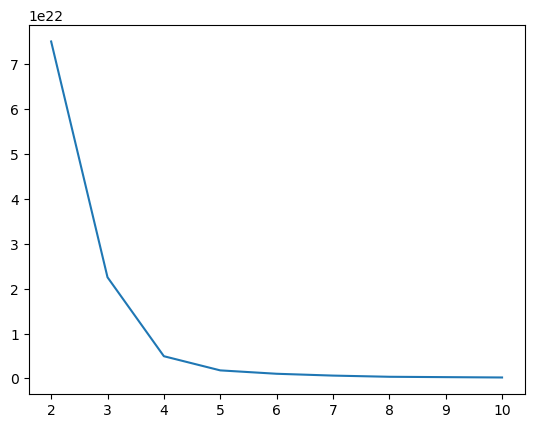

In [66]:
plt.plot(allcluster,distances); #tablodan da görülebileceği üzere kırılma noktası 4dür.

In [67]:
model=KMeans(4)

In [68]:
model=model.fit(x)

In [69]:
tahmin=model.predict(x)

In [70]:
tahmin

array([0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0,
       0, 0, 0, 0, 0, 0])

In [71]:
silhouette_score(x,tahmin)

0.8345814994075212

In [72]:
x["cluster"]=tahmin

In [73]:
x.head()

,MilitaryStrengthPowerIndex,Fighter/InterceptorStrengthvalue,TransportAircraftFleetStrengthvalue,TrainerAircraftFleetvalue,HelicopterFleetStrengthvalue,AttackHelicopterFleetStrengthvalue,TankStrengthvalue,AFV/APCStrengthvalue,Self-PropelledArtilleryStrengthvalue,TowedArtilleryStrengthvalue,RocketProjectorStrengthvalue,AirportTotalsvalue,defensespendingbudgetvalue,AvailableManpowervalue,TotalPopulationvalue,cluster
1,1.3444,0.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,43.0,12000000000,14325743,34940837,0
2,2.3137,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,4.0,250000000,1519438,3057220,0
3,0.4659,103.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,157.0,13000000000,20741263,41657488,0
4,0.8379,72.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,176.0,7000000000,6244205,30355880,0
5,0.6521,24.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,1138.0,4200000000,20179430,44694198,0


In [74]:
abs(x.corr()["MilitaryStrengthPowerIndex"]).sort_values(ascending=False) # mutlak almak için abs kullanırız.

0
MilitaryStrengthPowerIndex              1.000000
AFV/APCStrengthvalue                    0.361796
TowedArtilleryStrengthvalue             0.335405
TankStrengthvalue                       0.324300
Fighter/InterceptorStrengthvalue        0.310888
cluster                                 0.306527
TrainerAircraftFleetvalue               0.284756
Self-PropelledArtilleryStrengthvalue    0.268935
TransportAircraftFleetStrengthvalue     0.267104
RocketProjectorStrengthvalue            0.247800
HelicopterFleetStrengthvalue            0.244545
TotalPopulationvalue                    0.242678
AvailableManpowervalue                  0.236737
AttackHelicopterFleetStrengthvalue      0.231723
defensespendingbudgetvalue              0.192424
AirportTotalsvalue                      0.173362
Name: MilitaryStrengthPowerIndex, dtype: float64

In [75]:
x["cluster"].value_counts()

0    125
3     11
2      1
1      1
Name: cluster, dtype: int64

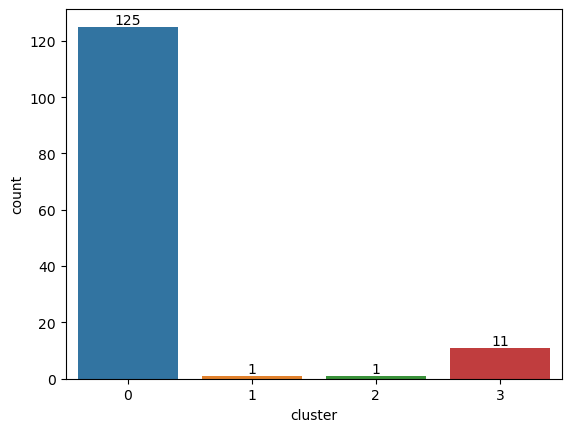

In [76]:
ax=sns.countplot(x=x["cluster"])
ax.bar_label(ax.containers[0]);

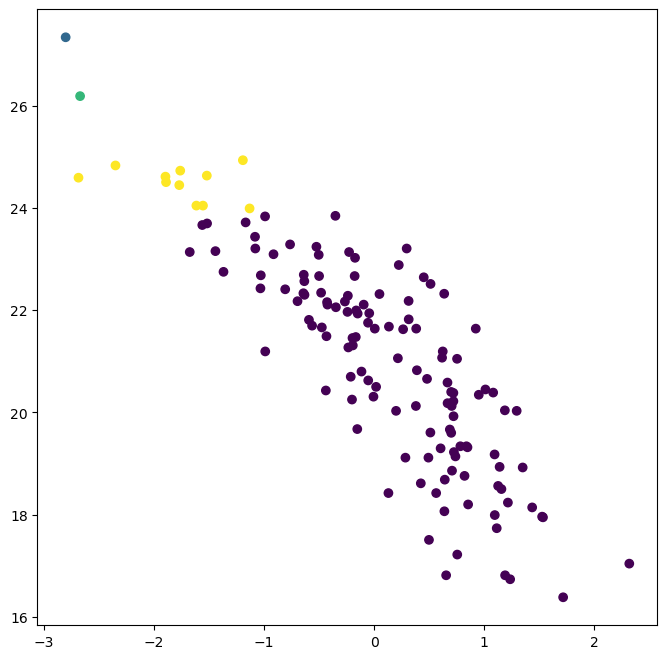

In [79]:
plt.figure(figsize=(8,8))
plt.scatter(np.log(x.MilitaryStrengthPowerIndex),np.log(x.defensespendingbudgetvalue),c=tahmin);

## Hierarchical Clustering

In [81]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [82]:
link_data=linkage(x,method="ward", metric="euclidean")

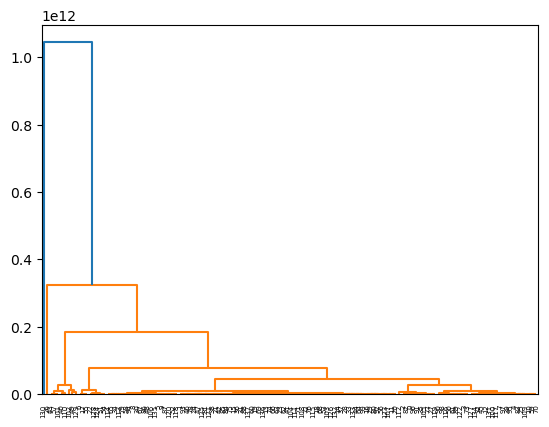

In [84]:
dendrogram(link_data)
plt.show()

In [85]:
from sklearn.cluster import DBSCAN

In [86]:
clusters=DBSCAN(eps=2.5,min_samples=4).fit(x)

In [87]:
set(clusters.labels_)

{-1}